# Titanic: Machine Learning from Disaster

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/640px-RMS_Titanic_3.jpg)

## Introduction

In this project we will try to predict the outcome of the RMS Titanic passengers, which ones survived the shipwreck, by exploring the Titanic dataset and creating a machine learning model. This will be a **classification** problem and we try out different models and ensemble methods and see what works best in this scenario.

We will begin by doing some data exploration and visualization to gather a better understanding of the dataset.

Next, we will perform some feature engineering to extract some new insights and add some extra information to feed to our model. We will also deal with any potential missing values.

Finally, we will try to predict the outcome by using different types of models and compare their performances in order to find the most suitable one for this project. In the end, we will attempt to improve our results by optimizing our final model parameters.

This project is based on the introductory [Kaggle competition](https://www.kaggle.com/c/titanic) with the same name.

To sum up, in this project we will:
1. Load and perform exploratory data analysis of the Titanic dataset
2. Feature engineering
3. Modelling
4. Optimize and fine-tuning model parameters 
5. Predict the outcome




Before we start, we will install the notebook dependencies:
- numpy
- pandas
- matplotlib
- seaborn
- sklearn

In [1]:
!pip install -q -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


Next, we will import all the necessary libraries

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import platform
import warnings

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

print('Python version: {}'.format(platform.python_version()))
print('NumPy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))

Python version: 3.6.9
NumPy version: 1.18.5
pandas version: 1.0.5


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [4]:
total_num = train_data.shape[0] + test_data.shape[0]
test_pct = round(test_data.shape[0] * 100 / total_num)

print('Number of entries in the training dataset: {}'.format(train_data.shape[0]))
print('Number of entries in the test dataset: {}'.format(test_data.shape[0]))

print('Percentage of entries for testing: {}%'.format(test_pct))

Number of entries in the training dataset: 891
Number of entries in the test dataset: 418
Percentage of entries for testing: 32%


## Exploratory Data Analysis

First, we will look at our initial data and observe the distribution of the features and visualize them in the shape of different plots. We will also check for missing values and look for any statistical relationships in the data.

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# List of features to view descriptive statistics
features = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Descriptive statistics for numeric and categorical features of the training data:

In [7]:
train_data[features].describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data[features].describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Gustafsson, Mr. Alfred Ossian",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [9]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Descriptive statistics for numeric and categorical features of the testing data:

In [10]:
test_data[features].describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
test_data[features].describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


**Is our training data balanced? Do we have a reasonable distribution of passengers who survived and those who did not?**

Looks like it is fairly balanced. Around 61% died while approximately 38% survived.

In [12]:
train_data['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Lets check for any missing values in our data.

In [13]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We will define a small helper function to calculate the percentage of missing values for a given feature.

In [14]:
def num_isna(feature):
  return round(train_data[feature].isna().sum() * 100 / train_data.shape[0], 3)

features_na = train_data.columns[train_data.isna().any()].tolist()

for feature in features_na:
  print('Percentage of NA values for {}: {}%'.format(feature, num_isna(feature)))

Percentage of NA values for Age: 19.865%
Percentage of NA values for Cabin: 77.104%
Percentage of NA values for Embarked: 0.224%


**Which features contain missing values in the training data?**

Cabin, Age and Embarked have missing values.

In [15]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
features_na = test_data.columns[test_data.isna().any()].tolist()

for feature in features_na:
  print('Percentage of NA values for {}: {}%'.format(feature, num_isna(feature)))

Percentage of NA values for Age: 19.865%
Percentage of NA values for Fare: 0.0%
Percentage of NA values for Cabin: 77.104%


**Which features contain missing values in the testing data?**

Cabin, Age and Fare have missing values.

### Visualizing the data 

We will plot the data distribution and statistical relationships.

**Did one gender survided more than the other?**

We can confirm that a significant higher number of female passengers survived compared to the male passengers.

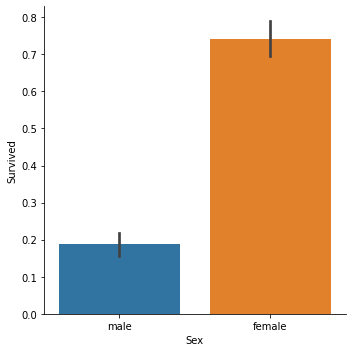

In [17]:
sns.catplot(x='Sex', y='Survived', kind='bar', data=train_data)

**What is the distribution of passengers ages?**

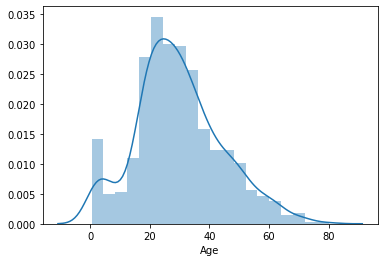

In [18]:
sns.distplot(train_data['Age'])

**What is the distribution of passengers parents/children aboard?**

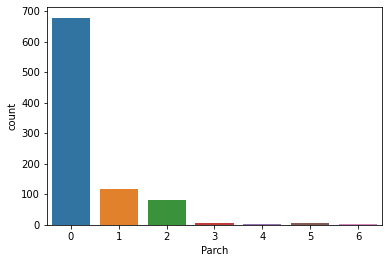

In [19]:
sns.countplot(train_data['Parch'])

**What is the distribution of passengers siblings/spouses aboard?**

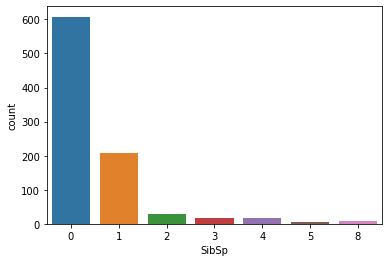

In [20]:
sns.countplot(train_data['SibSp'])

**What is the distribution of passengers classes?**

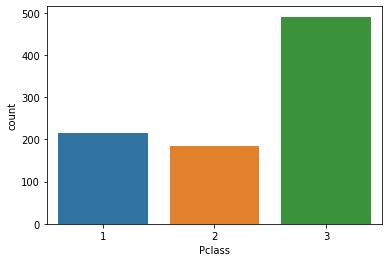

In [21]:
sns.countplot(train_data['Pclass'])

**Which classes of passengers survived the most? Comparing gender**

It looks like the higher their passenger class the better chance of survival and female passengers of upper classes may have a higher survival rate too.

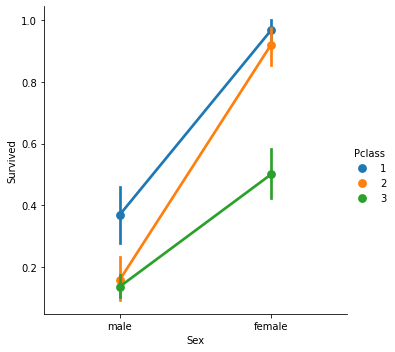

In [22]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind='point', data=train_data)

**Which places of embark have the most survivors? Comparing gender**

It seems passengers that embarked in *Cherbourg (C)* have a slightly higher survival rate, both male and female. The same may not be true for the other two places of embark.

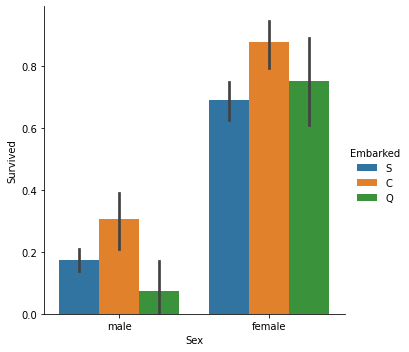

In [23]:
sns.catplot(x='Sex', y='Survived', hue='Embarked', kind='bar', data=train_data)

**Does family size has any impact on the survival chances? Comparing gender**

In both plots smaller families had a considerable higher survival rate compared to bigger ones.

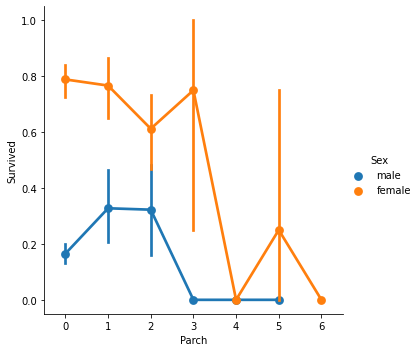

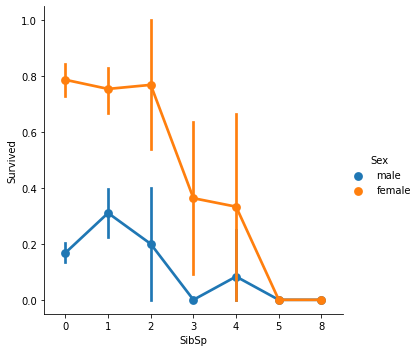

In [24]:
sns.catplot(x='Parch', y='Survived', hue='Sex', kind='point', data=train_data)
sns.catplot(x='SibSp', y='Survived', hue='Sex', kind='point', data=train_data)

**Which age group range have the most survivors? Comparing gender**

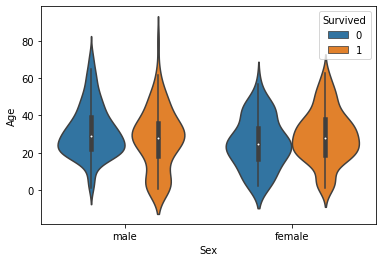

In [25]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_data)

**What is the distribution of passengers in terms of *Sex*, *Pclass*, *Embarked* place and *Age*?**

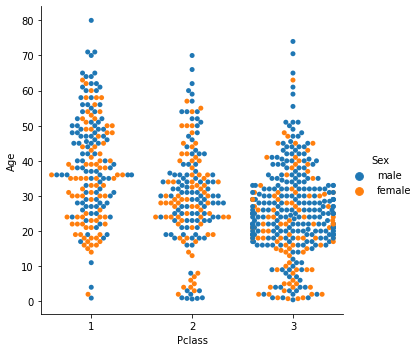

In [26]:
sns.catplot(x='Pclass', y='Age', hue='Sex', kind='swarm', data=train_data)

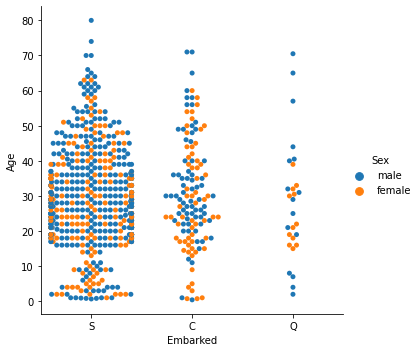

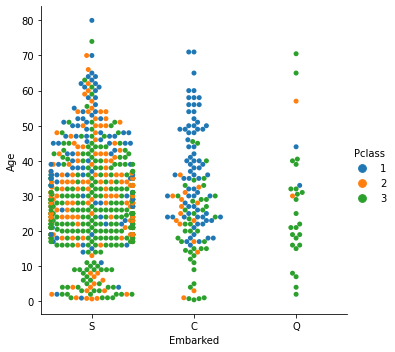

In [27]:
sns.catplot(x='Embarked', y='Age', hue='Sex', kind='swarm', data=train_data)
sns.catplot(x='Embarked', y='Age', hue='Pclass', kind='swarm', data=train_data)

**What is the likelyhood of survival by *Fare* price?**

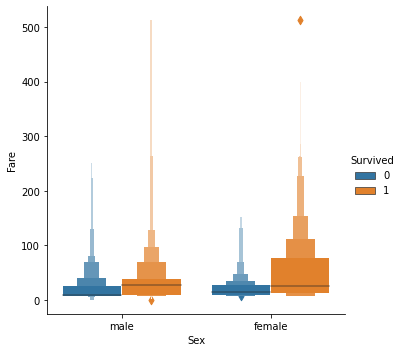

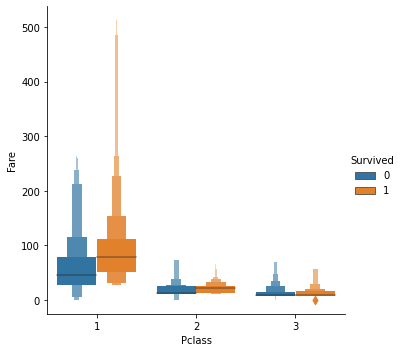

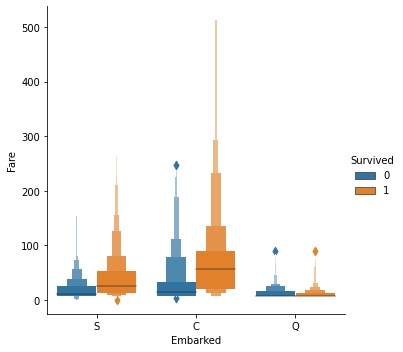

In [28]:
sns.catplot(x='Sex', y='Fare', hue='Survived', kind='boxen', data=train_data)
sns.catplot(x='Pclass', y='Fare', hue='Survived', kind='boxen', data=train_data)
sns.catplot(x='Embarked', y='Fare', hue='Survived', kind='boxen', data=train_data)

Finally, we combine *Fare*, *Age* and *Pclass* to observe the distribution of survivors.

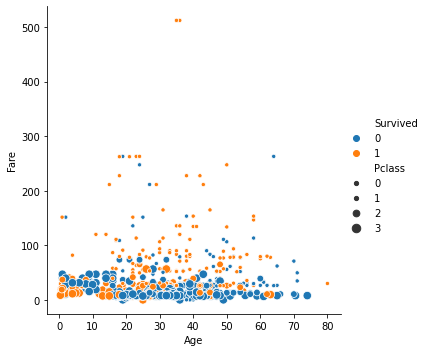

In [29]:
sns.relplot(x='Age', y='Fare', hue='Survived', size='Pclass', data=train_data)

## Feature engineering

### Handling missing values

To recap, we have 4 features with missing values: *Cabin*, *Age*, *Embarked* and *Fare*.

In [30]:
features_na = ['Cabin', 'Age', 'Embarked', 'Fare']

We will concatenate the training and testing data this time, to cover all the data, because we want to calculate the descriptive statistics values. We will use these values to fill in some of the missing information.

In [31]:
# We calculate the values and apply the tranpose to invert the rows/columns for easier manipulation
train_data_stats = train_data.describe().T
test_data_stats = test_data.describe().T

In [32]:
train_data_stats.head()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.500,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.00,0.000,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.00,2.000,3.0,3.0,3.0
Age,714.0,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,0.523008,1.102743,0.00,0.000,0.0,1.0,8.0


In [33]:
test_data_stats.head()

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.25,1100.5,1204.75,1309.0
Pclass,418.0,2.265550,0.841838,1.00,1.00,3.0,3.00,3.0
Age,332.0,30.272590,14.181209,0.17,21.00,27.0,39.00,76.0
SibSp,418.0,0.447368,0.896760,0.00,0.00,0.0,1.00,8.0
Parch,418.0,0.392344,0.981429,0.00,0.00,0.0,0.00,9.0


We will create an age distribution in order to fill in the missing age values. For the *Cabin* feature we will assign a value *N* and for the *Embarked* feature because there are only a few, we will assume the most common value.

In [34]:
def age_dist(df, stats):
  return np.random.randint(stats.at['Age', 'mean'] - stats.at['Age', 'std'],
                           stats.at['Age', 'mean'] + stats.at['Age', 'std'],
                           size=df['Age'].isna().sum())


train_data['Cabin'] = train_data['Cabin'].fillna('N')

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

train_data['Age'][train_data['Age'].isna()] = age_dist(train_data, train_data_stats)

In [35]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [36]:
test_data[test_data['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


To fill in the missing *Fare* value we will look at the median fare cost for the class of this specific passenger.

In [37]:
train_data[train_data['Pclass'] == 3].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,491.000000,491.000000,491.0,491.000000,491.000000,491.000000,491.000000
mean,439.154786,0.242363,3.0,26.352179,0.615071,0.393075,13.675550
std,264.441453,0.428949,0.0,11.699561,1.374883,0.888861,11.778142
min,1.000000,0.000000,3.0,0.420000,0.000000,0.000000,0.000000
25%,200.000000,0.000000,3.0,19.000000,0.000000,0.000000,7.750000
50%,432.000000,0.000000,3.0,26.000000,0.000000,0.000000,8.050000
75%,666.500000,0.000000,3.0,33.000000,1.000000,0.000000,15.500000
max,891.000000,1.000000,3.0,74.000000,8.000000,6.000000,69.550000


In [38]:
test_data['Cabin'] = test_data['Cabin'].fillna('N')

test_data['Fare'] = test_data['Fare'].fillna(test_data[test_data['Pclass'] == 3]['Fare'].median())

test_data['Age'][test_data['Age'].isna()] = age_dist(test_data, test_data_stats)

In [39]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We will transform the *Fare* and *Age* features into group bins.

In [40]:
pd.cut(train_data['Age'].astype(int), 5).cat.categories

IntervalIndex([(-0.08, 16.0], (16.0, 32.0], (32.0, 48.0], (48.0, 64.0], (64.0, 80.0]],
              closed='right',
              dtype='interval[float64]')

In [41]:
pd.qcut(train_data['Fare'], 4).cat.categories

IntervalIndex([(-0.001, 7.91], (7.91, 14.454], (14.454, 31.0], (31.0, 512.329]],
              closed='right',
              dtype='interval[float64]')

In [42]:
for df in [train_data, test_data]:
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

  df.loc[ df['Age'] <= 16, 'Age'] = 0
  df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
  df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
  df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
  df.loc[df['Age'] > 64, 'Age'] = 4
  df['Age'] = df['Age'].astype(int)

  df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
  df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
  df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare'] = 2
  df.loc[df['Fare'] > 31, 'Fare'] = 3
  df['Fare'] = df['Fare'].astype(int)

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,N,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,N,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,N,S,1


### Extracting new features

**Look for passengers surname, how many families were travelling together? Is there any connection between family members and survival rate?**

In [44]:
for df in [train_data, test_data]:
  df['Surname'] = df['Name'].str.split(',')
  df['Surname'] = df['Surname'].apply(lambda x: list(x)[0])
  df['Family'] = df.agg('{0[Surname]}:{0[FamilySize]}'.format, axis=1)

In [45]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,N,S,2,Braund,Braund:2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C85,C,2,Cumings,Cumings:2
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,N,S,1,Heikkinen,Heikkinen:1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,C123,S,2,Futrelle,Futrelle:2
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,N,S,1,Allen,Allen:1


Next, we will look at passengers name and try to infer their title and social status information.

In [46]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ''

for df in [train_data, test_data]:
  df['Title'] = df['Name'].apply(get_title)
  
  df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  df['Title'] = df['Title'].replace('Mlle', 'Miss')
  df['Title'] = df['Title'].replace('Ms', 'Miss')
  df['Title'] = df['Title'].replace('Mme', 'Mrs')

We can also add information about if the passenger was an adult male and also if the passenger was travelling alone. We saw earlier when visualizing the data that adult males had a lower survival rate.

In [47]:
for df in [train_data, test_data]:
  df['AdultMale'] = ((df['Age'] > 0) & (df['Sex'] == 'male')).astype(int)
  # df['Alone'] = (df['FamilySize'] == 1).astype(int)

Two features we haven't explore in greater detail are the *Ticket* and *Cabin*. First we can extract the first letter of the existing Cabins and called *Deck*.

In [48]:
for df in [train_data, test_data]:
  df['Deck'] = df['Cabin'].str[0]
  df['Cabin_Extra'] = df['Cabin'].str.contains(' ').astype(int)

In [49]:
train_data[train_data['Cabin'].str.startswith('F ')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Family,Title,AdultMale,Deck,Cabin_Extra
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,1,0,0,348123,0,F G73,S,1,Moen,Moen:1,Mr,1,F,1
128,129,1,3,"Peter, Miss. Anna",female,0,1,1,2668,2,F E69,C,3,Peter,Peter:3,Miss,0,F,1
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,2,0,0,348121,0,F G63,S,1,Humblen,Humblen:1,Mr,1,F,1
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,1,0,0,348124,0,F G73,S,1,Soholt,Soholt:1,Mr,1,F,1


**What are the different values for the *Cabin* feature? Does the deck where the passengers were affects survival rate?**

In [50]:
train_data[train_data['Cabin'] != 'N']['Cabin'].values

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',


In [51]:
train_data.groupby('Deck')['Survived'].value_counts(normalize=True).unstack()

Survived,0,1
Deck,,
A,0.533333,0.466667
B,0.255319,0.744681
C,0.406780,0.593220
D,0.242424,0.757576
E,0.250000,0.750000
F,0.384615,0.615385
G,0.500000,0.500000
N,0.700146,0.299854
T,1.000000,NaN


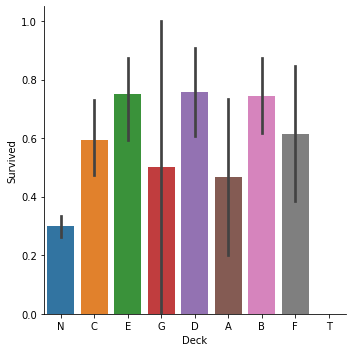

In [52]:
sns.catplot(x='Deck', y='Survived', kind='bar', data=train_data)

In [53]:
train_data.groupby(['Cabin_Extra'])['Survived'].value_counts(normalize=True).unstack()

Survived,0,1
Cabin_Extra,,
0,0.621684,0.378316
1,0.416667,0.583333


In [54]:
train_data.groupby(['Sex', 'Deck'])['Survived'].value_counts(normalize=True).unstack()

Survived            0         1
Sex    Deck                    
female A          NaN  1.000000
       B          NaN  1.000000
       C     0.111111  0.888889
       D          NaN  1.000000
       E     0.066667  0.933333
       F          NaN  1.000000
       G     0.500000  0.500000
       N     0.345622  0.654378
male   A     0.571429  0.428571
       B     0.600000  0.400000
       C     0.656250  0.343750
       D     0.533333  0.466667
       E     0.411765  0.588235
       F     0.625000  0.375000
       N     0.863830  0.136170
       T     1.000000       NaN

In [55]:
train_data.groupby(['Sex', 'Deck', 'Cabin_Extra'])['Survived'].value_counts(normalize=True).unstack()

Survived                        0         1
Sex    Deck Cabin_Extra                    
female A    0                 NaN  1.000000
       B    0                 NaN  1.000000
            1                 NaN  1.000000
       C    0            0.045455  0.954545
            1            0.400000  0.600000
       D    0                 NaN  1.000000
       E    0            0.066667  0.933333
       F    0                 NaN  1.000000
            1                 NaN  1.000000
       G    0            0.500000  0.500000
       N    0            0.345622  0.654378
male   A    0            0.571429  0.428571
       B    0            0.642857  0.357143
            1            0.500000  0.500000
       C    0            0.655172  0.344828
            1            0.666667  0.333333
       D    0            0.571429  0.428571
            1                 NaN  1.000000
       E    0            0.411765  0.588235
       F    0            0.400000  0.600000
            1            1.000000       NaN
       N    0            0.863830  0.136170
       T    0            1.000000       NaN

Lets take a look at our data with the new added features.

In [56]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Family,Title,AdultMale,Deck,Cabin_Extra
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,N,S,2,Braund,Braund:2,Mr,1,N,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,3,C85,C,2,Cumings,Cumings:2,Mrs,0,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,1,N,S,1,Heikkinen,Heikkinen:1,Miss,0,N,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,3,C123,S,2,Futrelle,Futrelle:2,Mrs,0,C,0
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,1,N,S,1,Allen,Allen:1,Mr,1,N,0


In [57]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Surname,Family,Title,AdultMale,Deck,Cabin_Extra
0,892,3,"Kelly, Mr. James",male,2,0,0,330911,0,N,Q,1,Kelly,Kelly:1,Mr,1,N,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,363272,0,N,S,2,Wilkes,Wilkes:2,Mrs,0,N,0
2,894,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,1,N,Q,1,Myles,Myles:1,Mr,1,N,0
3,895,3,"Wirz, Mr. Albert",male,1,0,0,315154,1,N,S,1,Wirz,Wirz:1,Mr,1,N,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,1,N,S,3,Hirvonen,Hirvonen:3,Mrs,0,N,0


For categorical values, we will encode them as integer values

In [58]:
def encode_features(df):
  df['Sex'] = df['Sex'].map({'male':0, 'female':1}).astype(int)
  df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
  df['Deck'] = df['Deck'].apply(ord)

  title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
  df['Title'] = df['Title'].map(title_mapping).astype(int)
  df['Title'] = df['Title'].fillna(0)

  return df

for df in [train_data, test_data]:
  df = encode_features(df)

In [59]:
def encode_features(df):
  ordinal_encoder = OrdinalEncoder()

  categorical_features = ['Surname', 'Family']

  ordinal_encoder.fit(df[categorical_features])
  df[categorical_features] = ordinal_encoder.transform(df[categorical_features])

  df[categorical_features] = df[categorical_features].astype(int)

  return df

for df in [train_data, test_data]:
  df = encode_features(df)

We will discard some features that are no longer necessary, either were transformed or are not relevant to our modelling step.

In [60]:
PassengerId = test_data['PassengerId']

In [61]:
drop_elements = ['PassengerId', 'Name', 'Family', 'Ticket', 'Cabin', 'Cabin_Extra', 'Surname', 'Family']

train_data = train_data.drop(drop_elements, axis=1)
test_data = test_data.drop(drop_elements, axis=1)

Correlation of our features.

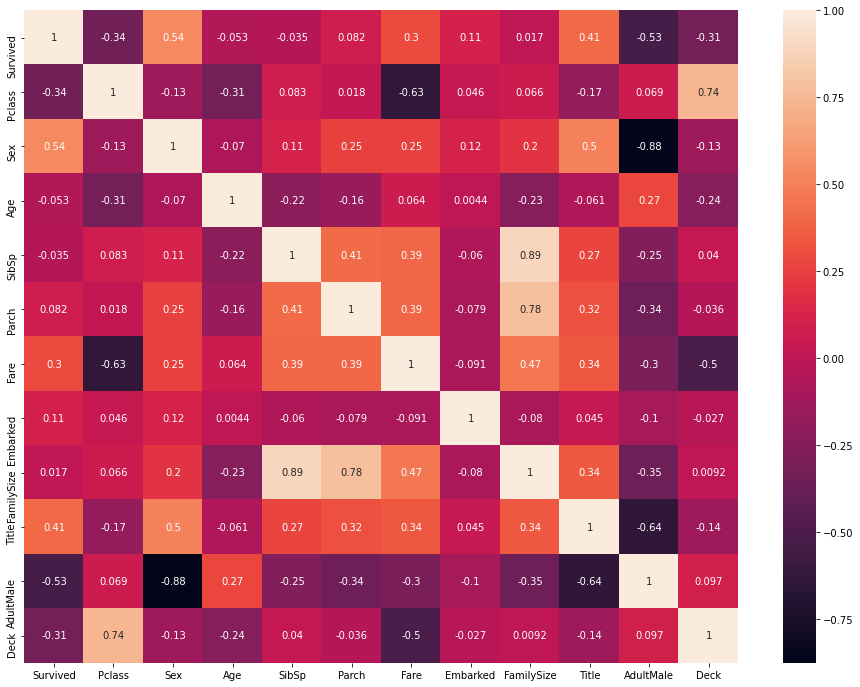

In [62]:
plt.figure(figsize=(16,12))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [63]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,AdultMale,Deck
0,0,3,0,1,1,0,0,0,2,1,1,78
1,1,1,1,2,1,0,3,1,2,3,0,67
2,1,3,1,1,0,0,1,0,1,2,0,78
3,1,1,1,2,1,0,3,0,2,3,0,67
4,0,3,0,2,0,0,1,0,1,1,1,78


## Modelling

At this stage we are ready to separate our features from the labels then we split our data into random train and test subsets, with a proportion of 75% of training data and 25% of testing data to fit the models. Before fitting each model we will normalize the input data.

In [64]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']
X_test = test_data.copy()

In [65]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Normalize the data.

In [66]:
# Copy dataframe to later inspect and compare true values and predictions
X_validate_df = X_validate.copy()

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train = standard_scaler.transform(X_train)
X_validate = standard_scaler.transform(X_validate)

In [67]:
model_results = pd.DataFrame(columns=['Score', 'Cross-validation score'])

### Random Forest Model

In [68]:
params = {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

random_forest = RandomForestClassifier(**params, n_jobs=-1).fit(X_train, y_train)

score = random_forest.score(X_train, y_train)
cross_val_score_mean = cross_val_score(random_forest, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['Random Forest'] = [score, cross_val_score_mean]

print([score, cross_val_score_mean])

[0.8924558587479936, 0.8427803379416282]


### Decision Tree Model

In [69]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier().fit(X_train, y_train)

score = decision_tree.score(X_train, y_train)
cross_val_score_mean = cross_val_score(decision_tree, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['Decision Tree'] = [score, cross_val_score_mean]

print([score, cross_val_score_mean])

[0.9213483146067416, 0.8187660010240656]


### Logistic Regression Model

In [70]:
params = {'C': 10, 'dual': True, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

logistic_regression = LogisticRegression(**params, n_jobs=-1).fit(X_train, y_train)

score = logistic_regression.score(X_train, y_train)
cross_val_score_mean = cross_val_score(logistic_regression, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['Logistic Regression'] = [score, cross_val_score_mean]

print([score, cross_val_score_mean])

[0.8202247191011236, 0.8026113671274961]


### K-nearest Neighbors Model

In [71]:
params = {'n_neighbors': 8, 'weights': 'uniform'}

knn = KNeighborsClassifier(**params).fit(X_train, y_train)

score = knn.score(X_train, y_train)
cross_val_score_mean = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['K-nearest Neighbors'] = [score, cross_val_score_mean]

print([score, cross_val_score_mean])

[0.8523274478330658, 0.8203277009728621]


### Gaussian Naive Bayes Model

In [72]:
gaussian_nb = GaussianNB().fit(X_train, y_train)

score = gaussian_nb.score(X_train, y_train)
cross_val_score_mean = cross_val_score(gaussian_nb, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['Gaussian Naive Bayes'] = [score, cross_val_score_mean]

print([score, cross_val_score_mean])

[0.8025682182985554, 0.7978494623655914]


### Support Vector Machine Model

In [73]:
params = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

svc = SVC(**params).fit(X_train, y_train)

score = svc.score(X_train, y_train)
cross_val_score_mean = cross_val_score(svc, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['Support Vector Machine'] = [score, cross_val_score_mean]

print([score, cross_val_score_mean])

[0.8940609951845907, 0.8299795186891961]


### Multi-layer Perceptron Model

In [74]:
from sklearn.neural_network import MLPClassifier

params = {'activation': 'tanh', 'early_stopping': False, 'learning_rate': 'constant', 'learning_rate_init': 0.001}

mlp = MLPClassifier(**params, max_iter=300).fit(X_train, y_train)

score = mlp.score(X_train, y_train)
cross_val_score_mean = cross_val_score(mlp, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['Multi-layer Perceptron'] = [score, cross_val_score_mean]

print([score, cross_val_score_mean])

[0.8298555377207063, 0.8154889912954429]


The output of the models scores and cross-validation score means show that the **Random Forest** model has the best results.

In [75]:
model_results

,Score,Cross-validation score
Random Forest,0.892456,0.842780
Decision Tree,0.921348,0.818766
Logistic Regression,0.820225,0.802611
K-nearest Neighbors,0.852327,0.820328
Gaussian Naive Bayes,0.802568,0.797849
Support Vector Machine,0.894061,0.829980
Multi-layer Perceptron,0.829856,0.815489


### Fine-tuning and hyper parameters optimization

Having picked our best model, now we will experiment different sets of parameters to check if we can improve its performance. We will look at at three different ways to validate and fine-tune our final model:
- **Feature selection** - Find out which is the optimal number of features.
- **Grid Search** - Hyper parameters optimization
- **Learning curve** - Evaluate training and cross-validation scores, look for possible underfitting or overfitting situations

**Feature selection**

In [76]:
selected_estimator = random_forest

In [77]:
use_feature_selection = True

selected_features = None

if use_feature_selection:
  selector = RFECV(estimator=selected_estimator, step=1, cv=5, scoring='accuracy', n_jobs=-1)
  selector = selector.fit(X_train, y_train)

  print('Optimal number of features: {}'.format(selector.n_features_))

  selected_features = X.columns[selector.get_support()].to_list()

  print('Best features: {}'.format(selected_features))
  print('Ranking: {}'.format(selector.ranking_))

  X_train = selector.transform(X_train)
  X_validate = selector.transform(X_validate)

Optimal number of features: 9
Best features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'FamilySize', 'Title', 'AdultMale', 'Deck']
Ranking: [1 1 1 1 3 1 2 1 1 1 1]


**Grid Search**

This might take a while since there are a few combinations to test.

In [78]:
def grid_search(estimator, X_train, X_test, y_train, y_test):
  # hyper parameters for Random Forest
  forest_grid = {
      'n_estimators': [100, 200],
      'criterion': ['gini', 'entropy'],
      'max_depth': [2, 4, 6, 8, None],
      'min_samples_split': [5, 2, 1, 0.2, .05],
      'min_samples_leaf': [5, 1, 0.2, .05],
  }

  # hyper parameters for K-nearest Neighbors
  knn_grid = {'n_neighbors': list(range(1,11)), 'weights': ['uniform', 'distance']}

  # hyper parameters for Support Vector Machine
  svm_grid = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

  # hyper parameters for Logistic Regression
  logistic_grid = {
      'C':[1,10,100,1000], 'penalty':['l1','l2','elasticnet'],
      'dual': [False, True], 'tol':[1e-4, 1e-5],
      'solver': ['newton-cg','lbfgs','liblinear','sag','saga']
  }

  # hyper parameters for Multi-layer Perceptron
  mlp_grid = {
      'activation':['identity','logistic','tanh','relu'],
      'learning_rate': ['constant','invscaling','adaptive'],
      'learning_rate_init': [0.003, 0.001, 0.0001],
      'early_stopping':[False, True]
  }

  tune_model = GridSearchCV(estimator, param_grid=forest_grid, cv=10, n_jobs=-1)
  tune_model.fit(X_train, y_train)

  print(type(estimator))

  print("\nGrid scores on development set:\n")

  means = tune_model.cv_results_['mean_test_score']
  stds = tune_model.cv_results_['std_test_score']

  print("%0.3f (+/-%0.03f) for %r\n" % 
        (means[tune_model.best_index_], stds[tune_model.best_index_] * 2, tune_model.cv_results_['params'][tune_model.best_index_]))

  print("Detailed classification report:\n")
  y_pred = tune_model.predict(X_test)
  
  print(classification_report(y_test, y_pred, target_names=['Died', 'Survived']))

  return tune_model.best_estimator_

In [79]:
selected_estimator = grid_search(selected_estimator, X_train, X_validate, y_train, y_validate)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>

Grid scores on development set:

0.844 (+/-0.071) for {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}

Detailed classification report:

              precision    recall  f1-score   support

        Died       0.83      0.92      0.87       165
    Survived       0.85      0.69      0.76       103

    accuracy                           0.83       268
   macro avg       0.84      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



**Learning Curve**

In [80]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
  plt.figure(facecolor=(1, 1, 1), figsize=(12, 8))
  plt.title(title)
  if ylim is not None:
      plt.ylim(*ylim)
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  train_sizes, train_scores, test_scores = learning_curve(
      estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.grid()

  plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

  plt.legend(loc="best")

  return plt

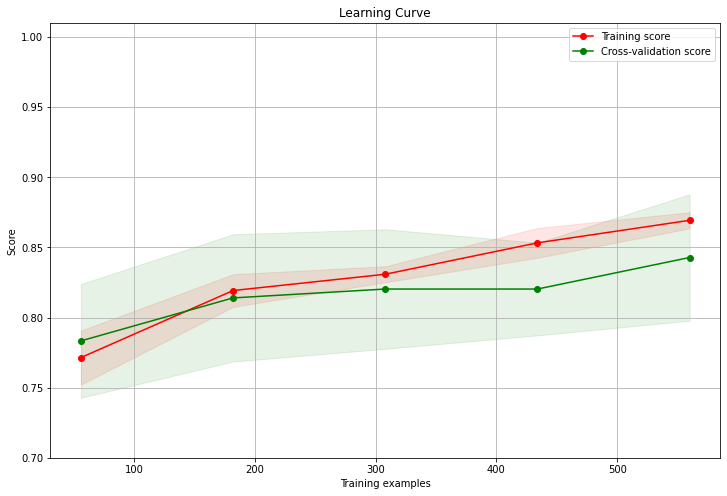

In [81]:
plot_learning_curve(selected_estimator, 'Learning Curve', X_train, y_train, (0.7, 1.01), cv=10, n_jobs=-1)
plt.show()

In [82]:
from sklearn.ensemble import VotingClassifier

voting_estimators = [('rf', random_forest), ('lreg', logistic_regression), ('knn', knn), ('svm', svc), ('mlp', mlp)]

voting = VotingClassifier(voting_estimators, 'hard').fit(X_train, y_train)

score = voting.score(X_train, y_train)
cross_val_score_mean = cross_val_score(voting, X_train, y_train, cv=10, n_jobs=-1).mean()

model_results.loc['Voting Hard'] = [score, cross_val_score_mean]

model_results

,Score,Cross-validation score
Random Forest,0.892456,0.842780
Decision Tree,0.921348,0.818766
Logistic Regression,0.820225,0.802611
K-nearest Neighbors,0.852327,0.820328
Gaussian Naive Bayes,0.802568,0.797849
Support Vector Machine,0.894061,0.829980
Multi-layer Perceptron,0.829856,0.815489
Voting Hard,0.869984,0.818843


In the end, we can look at the confusion matrix and check our results.

In [84]:
final_score = cross_val_score(selected_estimator, X_train, y_train, cv=10)

print('Accuracy: {:.3f} (+/- {:.2f})'.format(final_score.mean(), final_score.std() * 2))

Accuracy: 0.836 (+/- 0.08)


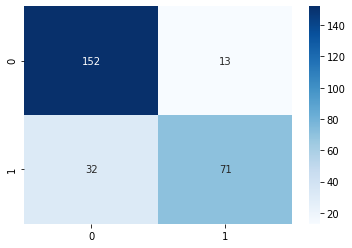

In [85]:
y_pred = selected_estimator.predict(X_validate)

# Confusion matrix for the Selected Model
sns.heatmap(confusion_matrix(y_validate, y_pred), annot=True, fmt='d', cmap='Blues')

In [86]:
final_score = cross_val_score(voting, X_train, y_train, cv=10)

print('Accuracy: {:.3f} (+/- {:.2f})'.format(final_score.mean(), final_score.std() * 2))

Accuracy: 0.817 (+/- 0.10)


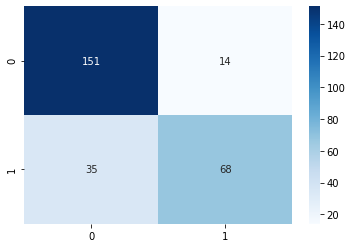

In [87]:
y_pred = voting.predict(X_validate)

# Confusion matrix for the Voting Hard Model
sns.heatmap(confusion_matrix(y_validate, y_pred), annot=True, fmt='d', cmap='Blues')

### Predictions

Comparing our predictions with the true values can give us more insights how to further improve our results in the future.

In [88]:
y_pred = selected_estimator.predict(X_validate)

In [89]:
X_validate_df['Survived'] = y_validate
X_validate_df['Prediction'] = y_pred

**False Negative predictions**

In [90]:
X_validate_df[(X_validate_df['Survived'] != X_validate_df['Prediction']) & (X_validate_df['Survived'] == 1)].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,AdultMale,Deck,Survived,Prediction
447,1,0,2,0,0,2,0,1,1,1,78,1,0
599,1,0,3,1,0,3,1,2,5,1,65,1,0
391,3,0,1,0,0,0,0,1,1,1,78,1,0
453,1,0,3,1,0,3,1,2,1,1,67,1,0
301,3,0,2,2,0,2,2,3,1,1,78,1,0


**False Positive predictions**

In [91]:
X_validate_df[(X_validate_df['Survived'] != X_validate_df['Prediction']) & (X_validate_df['Survived'] == 0)].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Title,AdultMale,Deck,Survived,Prediction
199,2,1,1,0,0,1,0,1,2,0,78,0,1
38,3,1,1,2,0,2,0,3,2,0,78,0,1
767,3,1,1,0,0,0,2,1,2,0,78,0,1
41,2,1,1,1,0,2,0,2,3,0,78,0,1
593,3,1,1,0,2,0,2,3,2,0,78,0,1
